In [1]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [2]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('train.csv')
print("train.csv loaded successfully.")

train.csv loaded successfully.


In [5]:
# Initial Data Inspection
print("\n Data Info & Types")
df.info()
print("\n\n Descriptive Statistics")
# stats for numeric columns
print(df.describe())
print("\n\n Value Counts")
# counts for categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())


 Data Info & Types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15533 entries, 0 to 15532
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15533 non-null  int64  
 1   Gender                          15533 non-null  object 
 2   Age                             15533 non-null  float64
 3   Height                          15533 non-null  float64
 4   Weight                          15533 non-null  float64
 5   family_history_with_overweight  15533 non-null  object 
 6   FAVC                            15533 non-null  object 
 7   FCVC                            15533 non-null  float64
 8   NCP                             15533 non-null  float64
 9   CAEC                            15533 non-null  object 
 10  SMOKE                           15533 non-null  object 
 11  CH2O                            15533 non-null  float64
 12  SCC         

In [6]:
sns.set_theme(style="whitegrid")


 Generating Plots


/tmp/ipython-input-4216596958.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='WeightCategory', order=df['WeightCategory'].value_counts().index, palette='viridis')


Saved: target_distribution.png


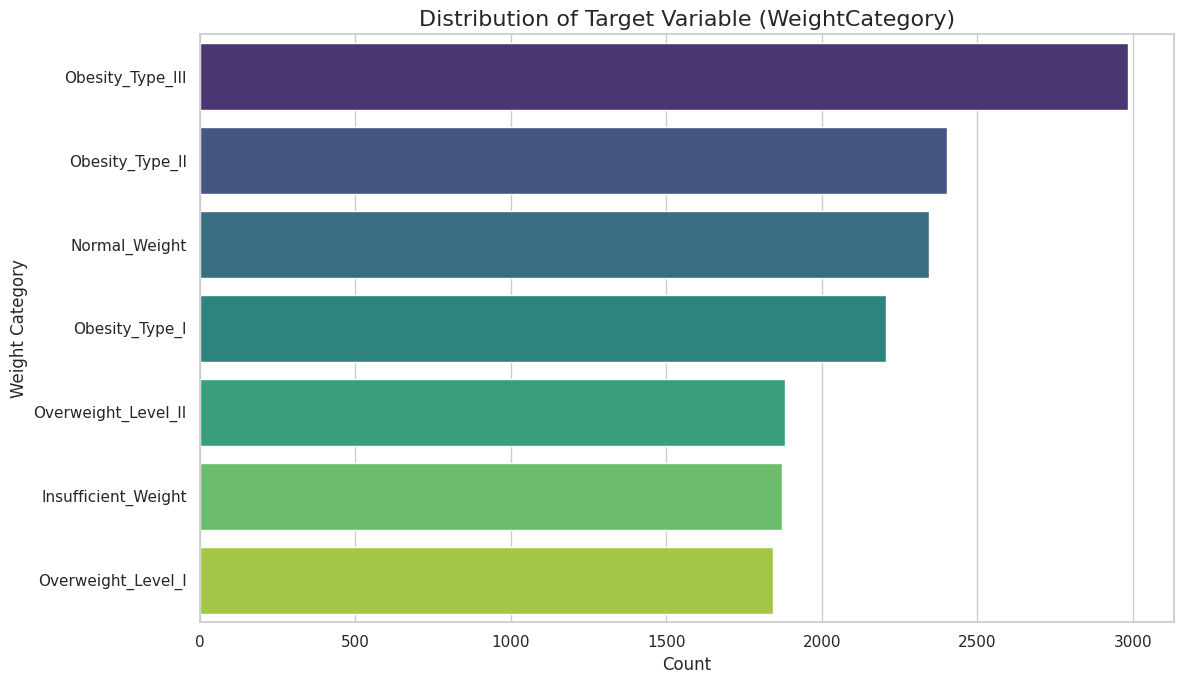

In [7]:
# Plot 1: Target Variable Distribution
print("\n Generating Plots")
plt.figure(figsize=(12, 7))
sns.countplot(data=df, y='WeightCategory', order=df['WeightCategory'].value_counts().index, palette='viridis')
plt.title('Distribution of Target Variable (WeightCategory)', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Weight Category', fontsize=12)
plt.tight_layout()
plt.savefig('target_distribution.png')
print("Saved: target_distribution.png")

/tmp/ipython-input-2397923783.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='WeightCategory', y='BMI', order=bmi_order, palette='coolwarm')


Saved: bmi_vs_target.png


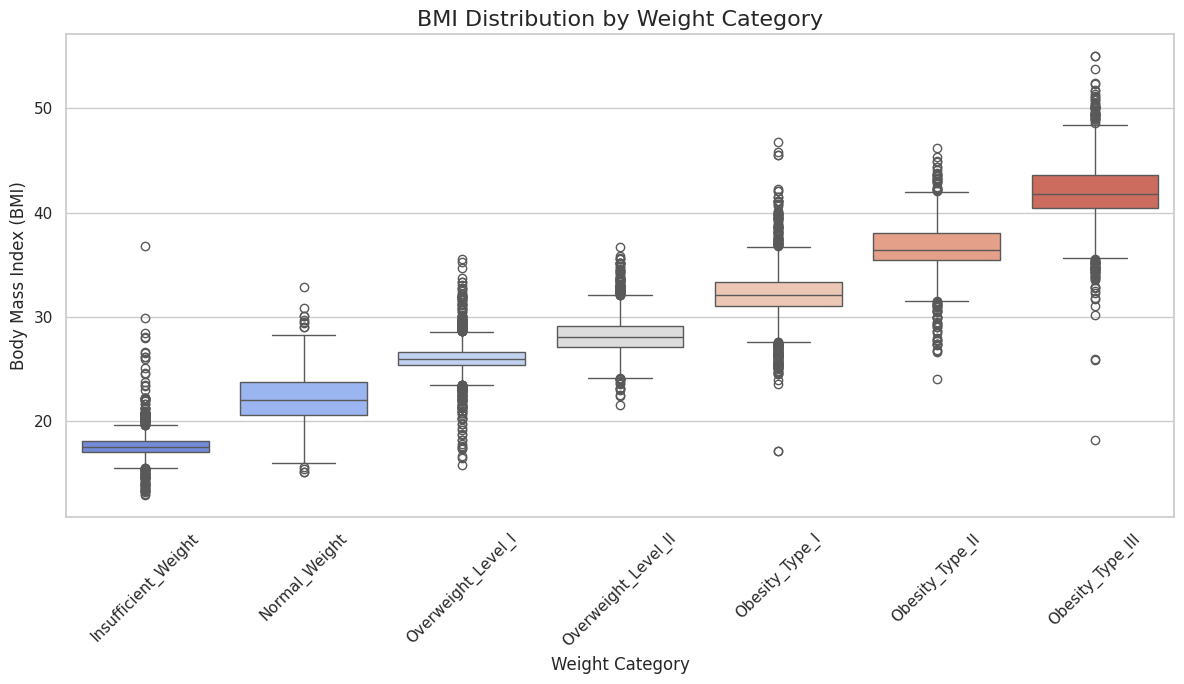

In [8]:

# Plot 2: Engineer and Plot BMI
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

plt.figure(figsize=(12, 7))

bmi_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
             'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
sns.boxplot(data=df, x='WeightCategory', y='BMI', order=bmi_order, palette='coolwarm')
plt.title('BMI Distribution by Weight Category', fontsize=16)
plt.xlabel('Weight Category', fontsize=12)
plt.ylabel('Body Mass Index (BMI)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('bmi_vs_target.png')
print("Saved: bmi_vs_target.png")

/tmp/ipython-input-9271511.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='WeightCategory', y='Age', order=bmi_order, palette='coolwarm')


Saved: age_vs_target.png


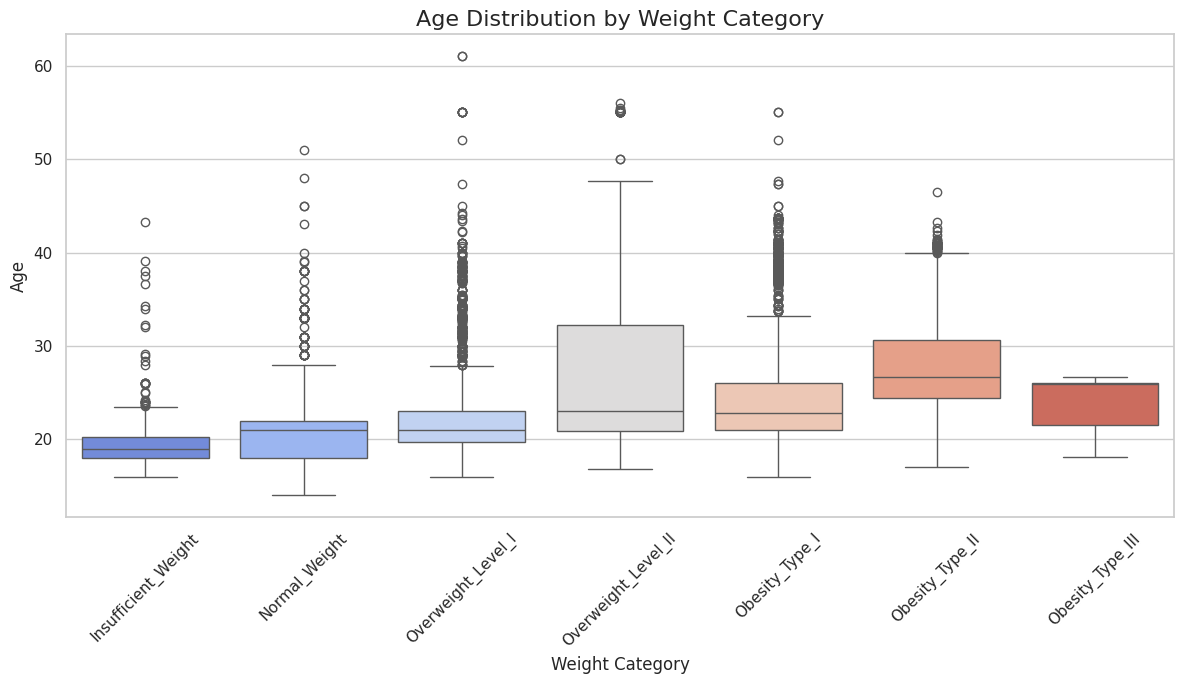

In [9]:
# Plot 3: Age vs Target
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='WeightCategory', y='Age', order=bmi_order, palette='coolwarm')
plt.title('Age Distribution by Weight Category', fontsize=16)
plt.xlabel('Weight Category', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('age_vs_target.png')
print("Saved: age_vs_target.png")

Saved: correlation_heatmap.png


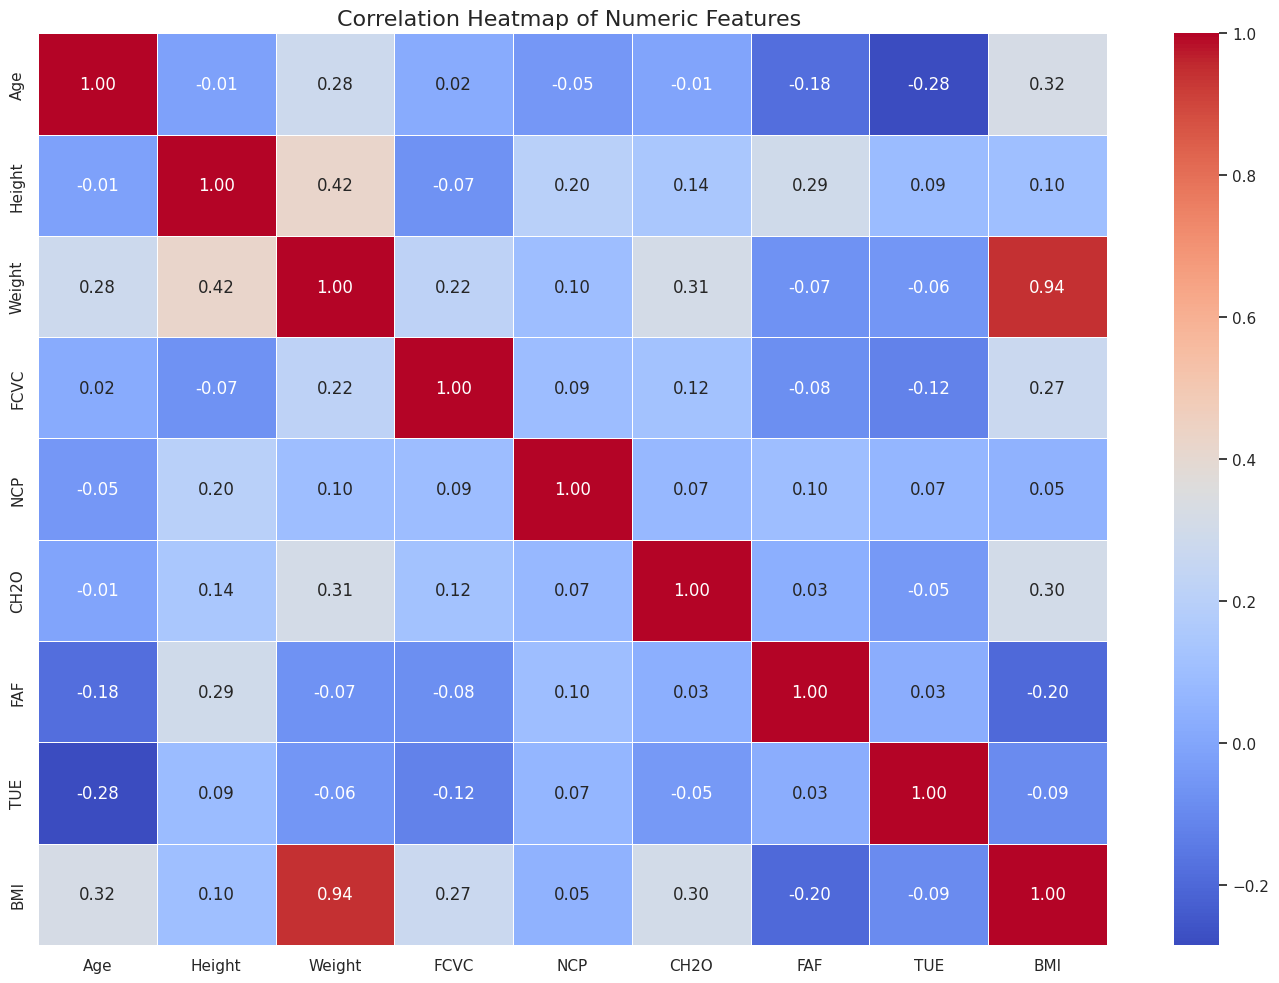

In [10]:
# Plot 4: Correlation Heatmap
plt.figure(figsize=(14, 10))
numeric_df = df.select_dtypes(include=[np.number]).drop('id', axis=1, errors='ignore')
for col in ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']:
    if col in numeric_df.columns:
        numeric_df[col] = np.round(numeric_df[col])

corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features ', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
print("Saved: correlation_heatmap.png")

Saved: weight_vs_height.png


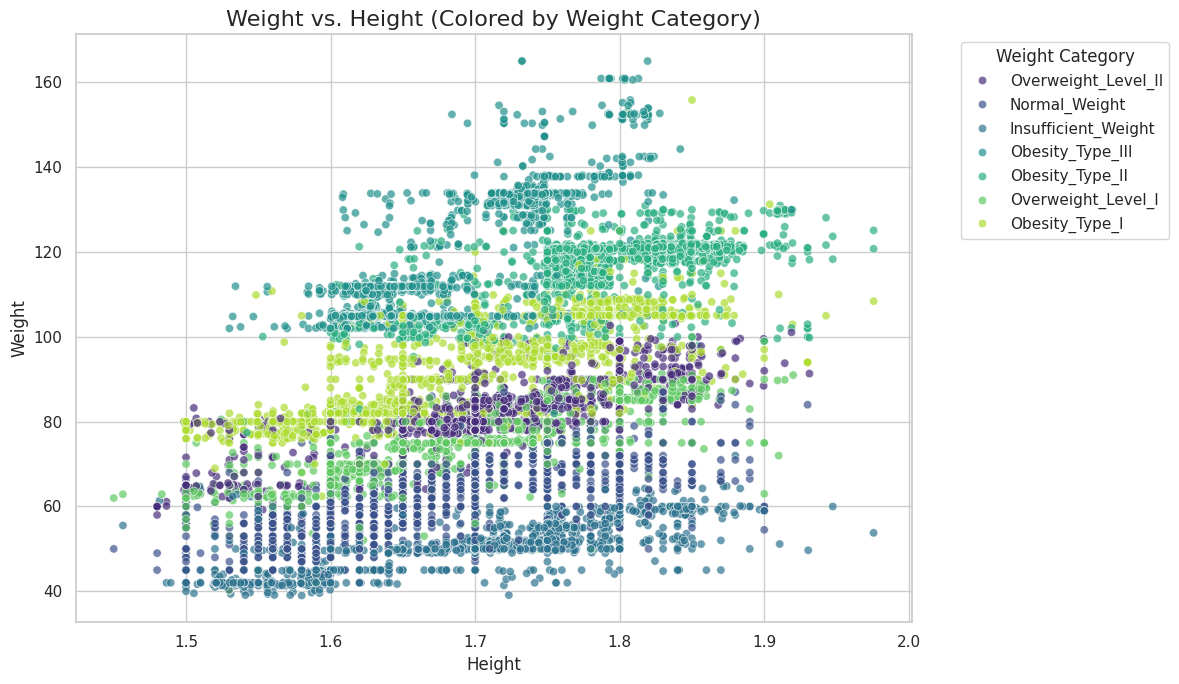

In [11]:
# Plot 5: Weight vs Height
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='Height', y='Weight', hue='WeightCategory', palette='viridis', alpha=0.7)
plt.title('Weight vs. Height (Colored by Weight Category)', fontsize=16)
plt.xlabel('Height', fontsize=12)
plt.ylabel('Weight', fontsize=12)
plt.legend(title='Weight Category', bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.savefig('weight_vs_height.png')
print("Saved: weight_vs_height.png")